## Задачи

#### Проверка гепотиз

Вопрос: Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события.
1. Нулевая гипотеза: Органический трафик **не отличается** от платного в целевые события.
2. Альтернативная гипотеза: Органический трафик **отличается** от платного в целевые события.

Вопрос: Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события.  
1. Нулевая гипотеза: Трафик с мобильных устройств **не отличается** от трафика с десктопных устройств в целевые события.
2. Альтернативная гипотеза: Трафик с мобильных устройств **отличается** от трафика с десктопных устройств в целевые события.

Вопрос: Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события.
1. Нулевая гипотеза: Трафик из городов присутствия (Москва и область, Санкт-Петербург) **не отличается** от трафика из иных регионов в целевые события.
2. Альтернативная гипотеза: Трафик из городов присутствия (Москва и область, Санкт-Петербург) **отличается** от трафика из иных регионов в целевые события.

#### Вопросы продуктовой команды

Из каких источников / кампаний / устройств / локаций к нам идёт самый целевой трафик с точки зрения объёма трафика, и с точки зрения CR ? 

Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события? 

Стоит ли нам увеличивать своё присутствие в соцсетях и давать там больше рекламы?

## GA Sessions

### Описание dataseta

* session_id — ID визита
* client_id — ID посетителя
* visit_date — дата визита
* visit_time — время визита
* visit_number — порядковый номер визита клиента
* utm_source — канал привлечения
* utm_medium — тип привлечения
* utm_adcontent - 
* utm_campaign — рекламная кампания
* utm_keyword — ключевое слово
* device_category — тип устройства
* device_os — ОС устройства
* device_brand — марка устройства
* device_model — модель устройства
* device_screen_resolution — разрешение экрана
* device_browser — браузер
* geo_country — страна
* geo_city — город

### Знакомство с Dataset'om

In [1]:
import pandas as pd
import missingno as msno
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import pyplot
from PIL import Image

План работ:
* Загрузить dataset(df)  и вывести 5 первых строк 
* shape посмотрим сколько строк и колонок в df 
* colomns смотрим какие колонки в df 
* info() смотрим заполниность колонок и формат колонок
* msno.matrix Покажет наглядно какие строки отсутствуют 
* copy() делаем копию df чтобы можно было вернутся обратно, если это понадобится

In [2]:
df = pd.read_csv('data/ga_sessions.csv', delimiter=',', low_memory=False)

In [3]:
def df_info(data):
    print('-----------------------------------------')
    print(data.info())
    print('-----------------------------------------')
    display(pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm'))
    print('-------------------------------------------')

In [4]:
df_info(df)

-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB
None
---------------------------

,0
session_id,0.000000
client_id,0.000000
visit_date,0.000000
visit_time,0.000000
visit_number,0.000000
utm_source,0.010000
utm_medium,0.000000
utm_campaign,11.810000
utm_adcontent,18.040000
utm_keyword,58.170000


-------------------------------------------


In [6]:
df.shape

(1860042, 18)

In [3]:
df.columns

Index(['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'utm_keyword', 'device_category', 'device_os', 'device_brand',
       'device_model', 'device_screen_resolution', 'device_browser',
       'geo_country', 'geo_city'],
      dtype='object')

In [47]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   session_id                1860042 non-null  object
 1   client_id                 1860042 non-null  object
 2   visit_date                1860042 non-null  object
 3   visit_time                1860042 non-null  object
 4   visit_number              1860042 non-null  int64 
 5   utm_source                1859945 non-null  object
 6   utm_medium                1860042 non-null  object
 7   utm_campaign              1640439 non-null  object
 8   utm_adcontent             1524427 non-null  object
 9   utm_keyword               777981 non-null   object
 10  device_category           1860042 non-null  object
 11  device_os                 789904 non-null   object
 12  device_brand              1492864 non-null  object
 13  device_model              16338 non-null  

<Axes: >

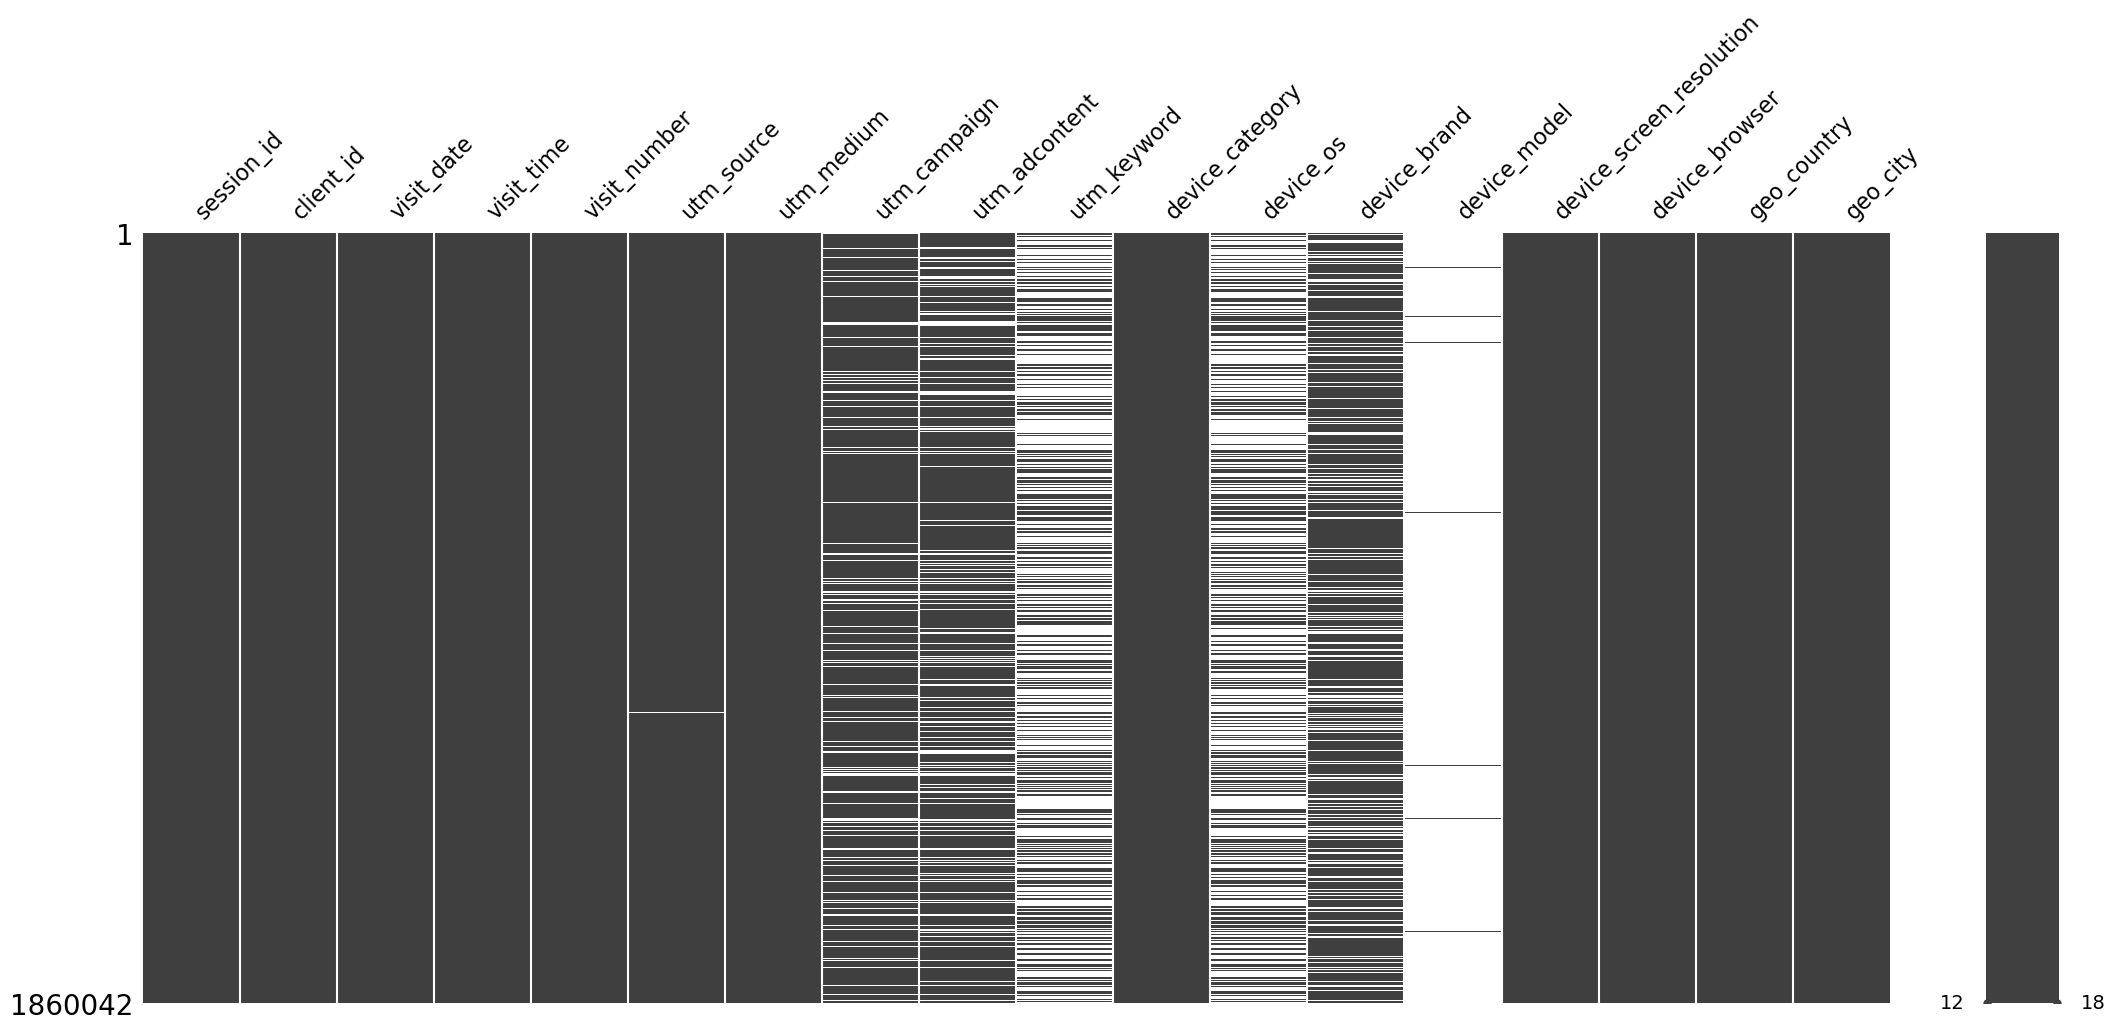

In [46]:
msno.matrix(df)

### Data Preparation

### Задача:

Разведовательный анализ EDA:
1. Поиск дубликатов
2. Пустые строки
3. Формат столбцов
4. Поиск аномальных значений
5. Зависимость колонок

##### 1. Поиск дубликатов: При проверке дубликаты не найдены


In [4]:
df.duplicated() 

0          False
1          False
2          False
3          False
4          False
           ...  
1860037    False
1860038    False
1860039    False
1860040    False
1860041    False
Length: 1860042, dtype: bool

##### 2. Пустые строки  


In [7]:
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values(ascending=False) # Проверяем %  заполнения столбцов
missing_values

device_model                99.121633
utm_keyword                 58.174009
device_os                   57.533002
device_brand                19.740307
utm_adcontent               18.043410
utm_campaign                11.806346
utm_source                   0.005215
geo_country                  0.000000
device_browser               0.000000
device_screen_resolution     0.000000
session_id                   0.000000
device_category              0.000000
client_id                    0.000000
utm_medium                   0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
geo_city                     0.000000
dtype: float64

In [8]:
missing_columns = missing_values[missing_values.values > 0].index.tolist() # Получаем отдельно список столбцов с незаполненными данными
missing_columns

['device_model',
 'utm_keyword',
 'device_os',
 'device_brand',
 'utm_adcontent',
 'utm_campaign',
 'utm_source']

##### Удаление столбцов 

In [9]:
df_clean = df.copy()

Принемаем решнение об удалении столбцов которые заполнены < 40%, так-как информации в них будет мало. Даже если мы заполним пропуки. missing_values нам показал что таких солбцов 3 device_model','utm_keyword','device_os'

In [10]:
df_clean = df.drop(columns=['device_model','device_os','utm_keyword'], axis = 1) # Принемаю решение о удаление столбцов

In [11]:
def print_useful_rows_info(df): 
    print("Количество полностью заполненных объектов из всей выборки:", len(df.dropna()))
    print("Процент полностью заполненных объектов из всей выборки:", round(len(df.dropna()) / len(df) * 100, 2))


In [12]:
print_useful_rows_info(df)

Количество полностью заполненных объектов из всей выборки: 14940
Процент полностью заполненных объектов из всей выборки: 0.8


In [13]:
print_useful_rows_info(df_clean)

Количество полностью заполненных объектов из всей выборки: 1230859
Процент полностью заполненных объектов из всей выборки: 66.17


##### Заполнение пропусков

В столбцах в которых заполнение > 40 процентов мы можем заполнить пропуски "Дригие", так мы сможем получить информацию из заполненых колонок

In [14]:
df_clean.device_brand = df_clean.device_brand.fillna((df_clean.device_brand.mode())[0])# заполнчем пропуск 'модой'(самое популярное значение), считаю тут самый оптимальный вариант
df_clean.utm_source = df_clean.utm_source.fillna((df_clean.utm_source.mode())[0])

In [15]:
# В этих колонках заменяем на 'другие'
df_clean.utm_adcontent = df_clean.utm_adcontent.fillna('other')
df_clean.utm_campaign = df_clean.utm_campaign.fillna('other')


##### Формат столбцов

После обьеденения 2 колонок visit_date visit_time, изначальные колонки удаляем чтобы не загружать dataset

In [16]:
df_clean['date_visit_time'] = pd.to_datetime(df_clean['visit_date'] + ' ' + df_clean['visit_time']) # обьеденяем и меняем формат столбцу visit_date 

In [17]:
# удаляем колонки которые теперь не нужны visit_date visit_time
df_clean = df_clean.drop('visit_date', axis = 1)
df_clean = df_clean.drop('visit_time', axis = 1)

In [18]:
df_clean.head()

,session_id,client_id,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,date_visit_time
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Zlatoust,2021-11-24 14:36:32
1,905544597018549464.1636867290.1636867290,210838531.1636867288,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,385x854,Samsung Internet,Russia,Moscow,2021-11-14 08:21:30
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk,2021-12-28 02:42:06
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,1,kjsLglQLzykiRbcDiGcD,cpc,other,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,2021-05-29 05:00:00
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2,kjsLglQLzykiRbcDiGcD,cpc,other,other,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,2021-05-29 05:00:00


## Ga_Hits

* session_id — ID визита
* hit_date — дата события
* hit_time — время события
* hit_number — порядковый номер события в рамках сессии
* hit_type — тип события
* hit_referer — источник события
* hit_page_path — страница события
* event_category — тип действия
* event_action — действие
* event_label — тег действия
* event_value — значение результата действия


### Знакомство с dataset'om

План работ:
* Загрузить dataset(df)  и вывести 5 первых строк 
* shape посмотрим сколько строк и колонок в df 
* colomns смотрим какие колонки в df 
* info() смотрим заполниность колонок и формат колонок
* msno.matrix Покажет наглядно какие строки отсутствую
* copy() делаем копию df чтобы можно было вернутся обратно, если это понадобится


In [7]:
def convert_int(x):
    if len(x) == 0:
        return 0
    return int(x.split('.')[0])
 
def convert_float(x):
    if len(x) == 0:
        return np.nan
    return float(x)


df_hits = pd.read_csv('data/ga_hits.csv', low_memory=False, usecols= ['session_id','hit_date', 'hit_time', 'hit_number', 'hit_type','hit_referer','hit_page_path','event_category','event_action','event_label', 'event_value'], converters={'hit_time' : convert_int ,'event_value' : convert_int})

In [13]:
def df_info(data):
    print('-----------------------------------------')
    print(data.info())
    print('-----------------------------------------')
    display(pd.DataFrame(round((df_hits.isna().mean()*100),2)).style.background_gradient('coolwarm'))
    print('-------------------------------------------')

In [14]:
df_info(df_hits)

-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   hit_date        object
 2   hit_time        int64 
 3   hit_number      int64 
 4   hit_type        object
 5   hit_referer     object
 6   hit_page_path   object
 7   event_category  object
 8   event_action    object
 9   event_label     object
 10  event_value     int64 
dtypes: int64(3), object(8)
memory usage: 1.3+ GB
None
-----------------------------------------


,0
session_id,0.000000
hit_date,0.000000
hit_time,0.000000
hit_number,0.000000
hit_type,0.000000
hit_referer,39.900000
hit_page_path,0.000000
event_category,0.000000
event_action,0.000000
event_label,23.910000


-------------------------------------------


In [11]:
df_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,0
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,0
2,885342191847998240.1640235807.1640235807,2021-12-23,796252,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,0
3,142526202120934167.1640211014.1640211014,2021-12-23,934292,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,0
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,0


In [55]:
df_hits.shape

(15726470, 11)

In [57]:
df_hits.columns

Index(['session_id', 'hit_date', 'hit_time', 'hit_number', 'hit_type',
       'hit_referer', 'hit_page_path', 'event_category', 'event_action',
       'event_label', 'event_value'],
      dtype='object')

In [21]:
df_clean_h.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Non-Null Count     Dtype 
---  ------          --------------     ----- 
 0   session_id      15726470 non-null  object
 1   hit_date        15726470 non-null  object
 2   hit_time        15726470 non-null  int64 
 3   hit_number      15726470 non-null  int64 
 4   hit_type        15726470 non-null  object
 5   hit_referer     9451666 non-null   object
 6   hit_page_path   15726470 non-null  object
 7   event_category  15726470 non-null  object
 8   event_action    15726470 non-null  object
 9   event_label     11966286 non-null  object
 10  event_value     15726470 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 1.3+ GB


<Axes: >

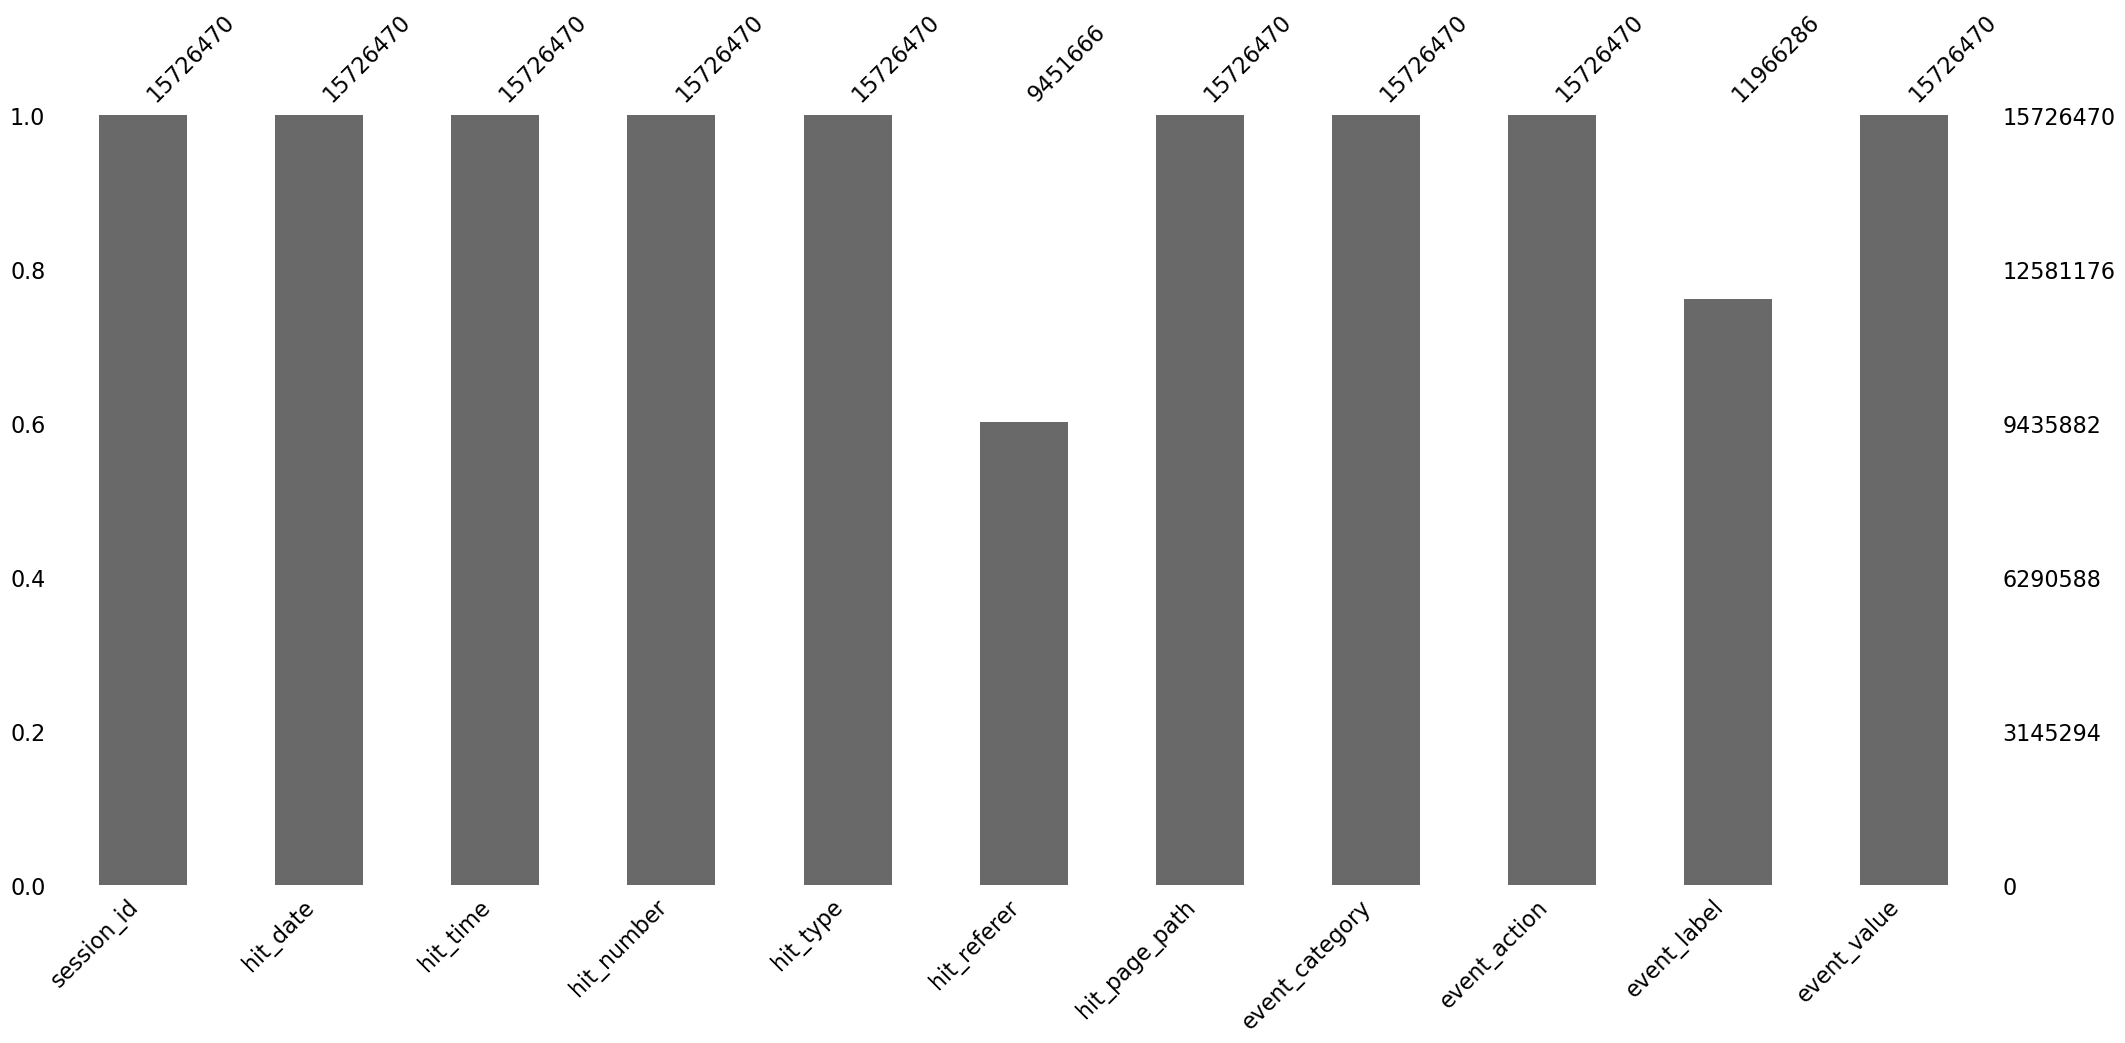

In [22]:
msno.bar(df_clean_h)

In [58]:
df_clean_h = df_hits.copy()

### Data Preparation

##### Заполнение пропусков

In [23]:
# В этих колонках заменяем на 'другие'
df_clean_h.hit_referer = df_clean_h.hit_referer.fillna('other')
df_clean_h.event_label = df_clean_h.event_label.fillna('other')

##### Формат столбцов

In [24]:
# меняем на формат 'дата время'
df_clean_h['hit_date'] = pd.to_datetime(df_clean_h['hit_date'])

##### Удаление столбцов 

In [25]:
# удаляем лишние колонки 
df_clean_h = df_clean_h.drop('hit_time', axis = 1)

## Основной DataSet

### Обьеденяем DataSet

In [26]:
df1 = pd.merge(df_clean_h, df_clean, left_on='session_id', right_on='session_id')

In [27]:
df1.head()

,session_id,hit_date,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value,...,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,date_visit_time
0,5639623078712724064.1640254056.1640254056,2021-12-23,30,event,other,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,other,0,...,cpc,other,other,mobile,Huawei,360x780,Chrome,Russia,Saint Petersburg,2021-12-23 13:07:36
1,5639623078712724064.1640254056.1640254056,2021-12-23,12,event,other,sberauto.com/cars/all/kia/seltos/20f30855?utm_...,card_web,view_new_card,other,0,...,cpc,other,other,mobile,Huawei,360x780,Chrome,Russia,Saint Petersburg,2021-12-23 13:07:36
2,5639623078712724064.1640254056.1640254056,2021-12-23,18,event,other,sberauto.com/cars/all/volkswagen/tiguan/0208cd...,card_web,view_new_card,other,0,...,cpc,other,other,mobile,Huawei,360x780,Chrome,Russia,Saint Petersburg,2021-12-23 13:07:36
3,5639623078712724064.1640254056.1640254056,2021-12-23,20,event,other,sberauto.com/cars/all/volkswagen/tiguan/0208cd...,card_web,view_new_card,other,0,...,cpc,other,other,mobile,Huawei,360x780,Chrome,Russia,Saint Petersburg,2021-12-23 13:07:36
4,5639623078712724064.1640254056.1640254056,2021-12-23,8,event,other,sberauto.com/cars/all/kia/seltos/20f30855?utm_...,card_web,view_new_card,other,0,...,cpc,other,other,mobile,Huawei,360x780,Chrome,Russia,Saint Petersburg,2021-12-23 13:07:36


In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15685219 entries, 0 to 15685218
Data columns (total 23 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   session_id                object        
 1   hit_date                  datetime64[ns]
 2   hit_number                int64         
 3   hit_type                  object        
 4   hit_referer               object        
 5   hit_page_path             object        
 6   event_category            object        
 7   event_action              object        
 8   event_label               object        
 9   event_value               int64         
 10  client_id                 object        
 11  visit_number              int64         
 12  utm_source                object        
 13  utm_medium                object        
 14  utm_campaign              object        
 15  utm_adcontent             object        
 16  device_category           object        
 17  device

### Создаем новые фичи

Собираем в список все целевые действия и создаем новый признак

In [29]:
target_event_actions = [
    'sub_car_claim_submit_click', 'sub_submit_success', 
    'sub_car_claim_click', 'sub_open_dialog_click', 
    'sub_call_number_click','sub_car_request_submit_click'
]
df1['action_taget'] = df1['event_action'].apply(lambda x : 'target' if x in target_event_actions else 'notarget')

Собираем в список все типы органического траффика

In [30]:
utm_medium_type_organic_not_organic = [
    '(none)', 'organic', 'referral'
]
df1['medium_type'] = df1['utm_medium'].apply(lambda x : 'organic' if x in utm_medium_type_organic_not_organic else 'pay')

Собираем в список все типы устройства

In [31]:
device_category_type = ['mobile', 'tablet']
df1['device_category_type'] = df1['device_category'].apply(lambda x : 'mobile' if x in device_category_type else 'desktop')

Собираем в список все города присутсвия

In [32]:
geo_city_presence = [
    'Saint Petersburg','Moscow', 
    'Podolsk', 'Korolyov', 'Kolomna',
    'Naro-Fominsk', 'Dzerzhinsky','Krasnogorsk',
    'Balashikha', 'Dmitrov', 'Sergiyev Posad',
    'Odintsovo', 'Lobnya', 'Yegoryevsk',
    'Kotelniki', 'Mytishchi', 'Zheleznodorozhny',
    'Serpukhov', 'Shchyolkovo', 'Vidnoye', 
    'Golitsyno', 'Ramenskoye', 'Dubna', 'Khimki',
    'Likino-Dulyovo', 'Ivanteyevka', 'LesnoyGorodok',
    'Istra', 'Losino-Petrovsky', 'SaintPetersburg',
    'Elektrogorsk', 'Protvino', 'Klimovsk',
    'Tomilino', 'Petrovo-Dalneye', 'Pushkino',
    'Orekhovo-Zuyevo', 'Voskresensk', 'Fryazino',
    'Kraskovo', 'Khotkovo', 'Kubinka',
    'Chernogolovka','Dolgoprudny'
]
df1['geo_city_presence'] = df1['geo_city'].apply(lambda x : 'city_presence' if x in geo_city_presence else 'other_city')

Создаем функцияю со списком моделей автомобиля и создаем новый признак - модель автомобиля

In [33]:
def find_auto(str):
    car_models = [
        '/skoda',  '/renault', 
        '/volkswagen', '/toyota', 
        '/kia',  '/nissan', 
        '/volvo', '/fiat',
        '/mercedes-benz', '/bmw',
        '/volkswagen', '/audi',
        '/peugeot', '/porsche',
        '/haval', '/lada-vaz',
        '/mini', '/lexus','/land-rover'
    ]
    found_car_model = 'model_unknown'
    for car_model in car_models:
        if car_model in str: 
            found_car_model = car_model
    return found_car_model
df1['car_type'] = df1['hit_page_path'].apply(lambda x : find_auto(x))

## Выполнение задач

### Проверка гепотиз

**Функция статистического Биноминального критерия значимости**

In [2]:
img = Image.open("Таблица для гепотиз.jpg")
img.show()

Выбор метода подтверждения гепотизы:
У нас есть две группы людей разделением CR, мы знаем что группы друг от друга не зависимы и распределение групп не нормальноб по этому в данных условиях можно применить 2 метода U-кретерий Манна Уитни и Биноминального критерия.\
По скольку наши группы в процессе подтверждения гипотизы  разделяяются на подгруппы и надо учитывать все данные принемаю решение об использовании Биноминального критерия.



* на вход ф-ии подается кол-во успехов варианта А и общее число вариантов m1,n1 
* число успехов варанта Б и общее число вариантов m2, n2, 
* а также уровень значимости - опционально (0.05 по умолчанию) \
Дальше применяем формулу биноминального критерия: \
 T = (m1/n1 - m2/n2)/((m1+m2)/(n1+n2)*(1 - (m1+m2)/(n1+n2))*(1/n1+1/n2))**0.5

In [34]:
def p_bin(m1,n1,m2,n2,level_conf=0.05):
    T = (m1/n1 - m2/n2)/((m1+m2)/(n1+n2)*(1 - (m1+m2)/(n1+n2))*(1/n1+1/n2))**0.5 
    P = 1 - stats.norm.cdf(T)
    print(f"Stats {T}, p-value {P}")
    if (P < level_conf):
        print(f"На уровне значимости {level_conf} нулевая гипотеза отвергается в пользу альтернативной: Вариаент А более значим (значимая разница Варианта А перед вариантом Б есть)")
    else: 
        print(f"На уровне значимости {level_conf} нулевая гипотеза принимается (нет значимой разницы между вариантом А и Б)")          

**1 Вопрос:** Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события.
1. Нулевая гипотеза: Органический трафик **не отличается** от платного в целевые события.
2. Альтернативная гипотеза: Органический трафик **отличается** от платного в целевые события.

Сделаем сводную таблицу по 2 показателям, "Тип трафика" и "Тип привлечения"

In [35]:
summary_table = df1.groupby(['medium_type', 'action_taget'])['session_id'].count()
summary_table

medium_type  action_taget
organic      notarget        5777695
             target            39872
pay          notarget        9808238
             target            59414
Name: session_id, dtype: int64

In [36]:
# Подаем данные которые получили в таблице summary_table
p_bin(59414,9808238+59414,39872, 5777695+39872 )

Stats -20.084816152154797, p-value 1.0
На уровне значимости 0.05 нулевая гипотеза принимается (нет значимой разницы между вариантом А и Б)


**2 Вопрос:** Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события.  
1. Нулевая гипотеза: Трафик с мобильных устройств **не отличается** от трафика с десктопных устройств в целевые события.
2. Альтернативная гипотеза: Трафик с мобильных устройств **отличается** от трафика с десктопных устройств в целевые события.

Сделаем сводную таблицу по 2 показателям, "Тип трафика", "Тип устройства"

In [37]:
summary_table2 = df1.groupby(['device_category_type', 'action_taget'])['session_id'].count()
summary_table2

device_category_type  action_taget
desktop               notarget         3921408
                      target             23846
mobile                notarget        11664525
                      target             75440
Name: session_id, dtype: int64

In [38]:
# Подаем данные которые получили в таблице summary_table2
p_bin(75440,11664525+75440, 23846,3921408+23846 )

Stats 8.270194225881966, p-value 1.1102230246251565e-16
На уровне значимости 0.05 нулевая гипотеза отвергается в пользу альтернативной: Вариаент А более значим (значимая разница Варианта А перед вариантом Б есть)


**3 Вопрос:** Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события.
1. Нулевая гипотеза: Трафик из городов присутствия (Москва и область, Санкт-Петербург) **не отличается** от трафика из иных регионов в целевые события.
2. Альтернативная гипотеза: Трафик из городов присутствия (Москва и область, Санкт-Петербург) **отличается** от трафика из иных регионов в целевые события.

In [39]:
summary_table3 = df1.groupby(['geo_city_presence', 'action_taget'])['session_id'].count()
summary_table3

geo_city_presence  action_taget
city_presence      notarget        9847695
                   target            67130
other_city         notarget        5738238
                   target            32156
Name: session_id, dtype: int64

In [40]:
# Подаем данные которые получили в таблице summary_table3
p_bin(67130,9847695+67130, 32156,5738238+32156)

Stats 28.851484895594773, p-value 0.0
На уровне значимости 0.05 нулевая гипотеза отвергается в пользу альтернативной: Вариаент А более значим (значимая разница Варианта А перед вариантом Б есть)


### Ответ на вопросы

**1 вопрос:** Из каких источников / кампаний / устройств / локаций к нам идёт самый целевой трафик с точки зрения объёма трафика, и с точки зрения CR ?

Делаем таблицу с группировкой по типу конверсии - в целевое действие и нецелевое действие, типу траффика и типу устройств, а также городам присуствия

In [41]:
df1.groupby(['action_taget', 'medium_type', 'device_category_type' ,'geo_city_presence'])['session_id'].count()

action_taget  medium_type  device_category_type  geo_city_presence
notarget      organic      desktop               city_presence        1517897
                                                 other_city            849991
                           mobile                city_presence        2261920
                                                 other_city           1147887
              pay          desktop               city_presence        1203764
                                                 other_city            349756
                           mobile                city_presence        4864114
                                                 other_city           3390604
target        organic      desktop               city_presence          11141
                                                 other_city              5208
                           mobile                city_presence          15616
                                                 other_city              79

1) Наибольший объем неорганического траффика идет с мобильных устройств из городов присуствия. 
2) Наибольший объем CR трафика, к нам идет из платныного мобильнного трафика из городов присутсвия.

**2 вопрос:** Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события? 

Делаем таблицу с группировкой по типу конверсии - в целевое действие и нецелевое действие, а также модели автомобиля

In [42]:
car_type = df1.groupby(['action_taget', 'car_type'])['session_id'].count()

In [43]:
# Группируем 2 списка "Целевые","Не целевые". И строим график для наглядности топ 10 запросов: в графике убираем самый популярный ответ "другое авто", смотрим что получилось
car_type_notarget = car_type.notarget.sort_values(ascending=False).iloc[1:11]
car_type_target = car_type.target.sort_values(ascending=False).iloc[1:11]

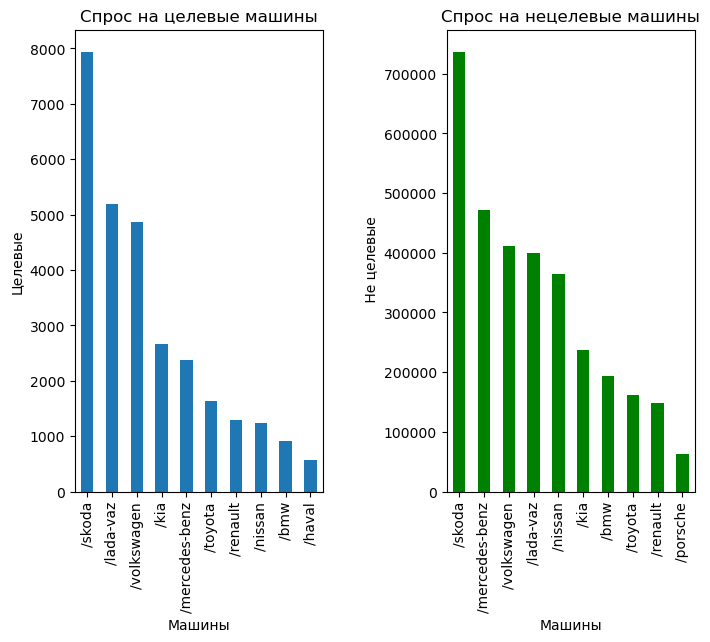

In [44]:
fig, axes = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.5) 
car_type_notarget.plot.bar( ax = axes[1], title='Спрос на нецелевые машины',
 ylabel=' Не целевые', xlabel='Машины', figsize=( 8 , 6 ), color = 'green')
car_type_target.plot.bar( ax = axes[0], title='Спрос на целевые машины',
 ylabel='Целевые', xlabel='Машины', figsize=( 8, 6 ));


Топ5 автомобилей: skoda, lada-vaz, volkswagen, kia, mercedes-benz

## Ответы на вопроосы и гепотизы 

Вопрос: Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события.
1. Нулевая гипотеза: Органический трафик **не отличается** от платного в целевые события.
2. Альтернативная гипотеза: Органический трафик **отличается** от платного в целевые события.\
Ответ:\
Используем биномиальный критерий проверки гипотезы. **Нулевая гипотеза ПОДТВЕРЖДАЕТСЯ**. \
Вариант A не значительно отличается от варианта B по этому делаем вывод  что Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события.


Вопрос: Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события.  
1. Нулевая гипотеза: Трафик с мобильных устройств **не отличается** от трафика с десктопных устройств в целевые события.
2. Альтернативная гипотеза: Трафик с мобильных устройств **отличается** от трафика с десктопных устройств в целевые события. \
Ответ:\
Используем биномиальный критерий проверки гипотезы. **нулевая гипотеза ОТВЕРГАЕТСЯ в пользу альтернативной**. \
Вариант A более значим  чем вариант B по этому делаем вывод что трафик с мобильных устройств ОТЛИЧАЕТСЯ от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события.




Вопрос: Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события.
1. Нулевая гипотеза: Трафик из городов присутствия (Москва и область, Санкт-Петербург) **не отличается** от трафика из иных регионов в целевые события.
2. Альтернативная гипотеза: Трафик из городов присутствия (Москва и область, Санкт-Петербург) **отличается** от трафика из иных регионов в целевые события. \
Ответ:\
Используем биномиальный критерий проверки гипотезы. **нулевая гипотеза ОТВЕРГАЕТСЯ в пользу альтернативной**. \
Вариант A более значим  чем вариант B по этому делаем вывод что трафик из городов присутствия (Москва и область, Санкт-Петербург) ОТЛИЧАЕТСЯ от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события.

### Ответьте на вопросы продуктовой команды:

Из каких источников / кампаний / устройств / локаций к нам идёт самый целевой трафик с точки зрения объёма трафика, и с точки зрения CR ? 

1) Наибольший объем неорганического траффика идет с мобильных устройств из городов присуствия. 
2) Наибольший объем CR трафика, к нам идет из платныного мобильнного трафика из городов присутсвия.

Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события? 

Топ 5 автомобилей пользующийся наибольшим спросом: skoda, lada-vaz, volkswagen, kia, mercedes-benz

Стоит ли нам увеличивать своё присутствие в соцсетях и давать там больше рекламы ?

Благодаря первой гепозе мы знаем чтоб неорганический траффик НЕ имеет решающее значение для повышения конверсии, по этому НЕ следует увеличить свое присутвие в социальных сетях, давая больше рекламы. \
Однако мы знаем что наибольшую конерсию мы получаем через мобильные устройства из городов присутсвия: нам следует сосредоточить наши ресурсы на мобильном сегменте, нужно найти самые популярные соц-сети и начсать продвежение наиболее популярных моделей авто (skoda, lada-vaz, volkswagen, kia, mercedes-benz).